In [102]:
# from sympy import S, sin, symbols, Matrix, zeros
from IPython.core.display import display
import numpy as np
from math import sin

left, right = 1, 6

points_count = 6
sections_count = points_count - 1

step = (right - left) / sections_count
x = np.linspace(left, right, 6)
y = np.sin(x)

In [118]:
x

array([1., 2., 3., 4., 5., 6.])

In [119]:
y

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ])

In [127]:
h = [None] + [x[i + 1] - x[i] for i in range(sections_count)]
h

[None, 1.0, 1.0, 1.0, 1.0, 1.0]

In [216]:
from numpy import zeros

A = zeros([4, 4])
B = zeros(4)
for i in range(points_count - 2):
    if i > 0:
        A[i, i - 1] = h[i + 1]
    A[i, i] = 2 * (h[i + 1] + h[i + 2])
    if i < points_count - 3:
        A[i, i + 1] = h[i + 2]

    tm1 = (y[i + 2] - y[i + 1]) / h[i + 2]
    tm2 = (y[i + 1] - y[i]) / h[i + 1]
    B[i] = 3 * (tm1 - tm2)

In [217]:
A

array([[4., 1., 0., 0.],
       [1., 4., 1., 0.],
       [0., 1., 4., 1.],
       [0., 0., 1., 4.]])

In [218]:
B

array([-2.50801158, -0.38923525,  2.08740217,  2.64489167])

In [219]:
from numpy.linalg import solve
from numpy import concatenate

c = concatenate([[0], solve(A, B), [0]])
c

array([ 0.        , -0.61677226, -0.04092253,  0.39122714,  0.56341613,
        0.        ])

In [220]:
b = np.full(6, None)
for i in range(1, points_count):
    tm_a = (y[i] - y[i - 1]) / h[i]
    tm_b = h[i] * (2 * c[i] + c[i - 1]) / 3
    b[i] = tm_a - tm_b
b

array([None, 0.47900795010028235, -0.535304975487355, -1.1450997545765687,
       -0.7081415812217664, 0.4917033994877792], dtype=object)

In [221]:
d = np.full(6, None)
for i in range(1, points_count):
    d[i] = (c[i] - c[i - 1]) / (3 * h[i])
d

array([None, -0.20559075404124857, 0.19194990942264314,
       0.14404989253229472, 0.05739632906274411, -0.1878053769764334],
      dtype=object)

In [222]:
a = np.full(6, None)
for i in range(1, points_count):
    a[i] = y[i]
a

array([None, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282,
       -0.9589242746631385, -0.27941549819892586], dtype=object)

In [223]:
from IPython.core.display import Math
from sympy import symbols, latex, S

x_var = symbols('x')
splines = np.full(6, None)
for i in range(1, points_count):
    splines[i] = a[i] + b[i] * (x_var - x[i]) + c[i] * (x_var - x[i])**2 + d[i] * (x_var - x[i])**3
    splines[i] = splines[i].simplify()
    display(Math(f'S_{i}(x) = ' + latex(splines[i].n(3)) + f'\\;\\;\\;x \in [{x[i - 1]}, {x[i]}]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

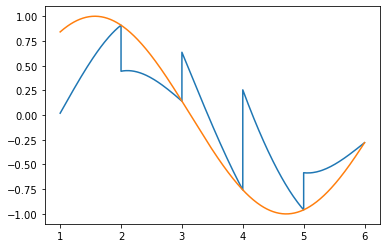

In [224]:
import matplotlib.pyplot as plt

full_args = []
full_spline_values = []
full_base_values = []
for i in range(1, points_count):
    args = np.linspace(x[i - 1], x[i], 100)
    spline_values = np.array([splines[i].subs(x_var, arg).n(3) for arg in args])
    base_values = np.sin(args)

    full_args.append(args)
    full_spline_values.append(spline_values)
    full_base_values.append(base_values)

full_args = concatenate(full_args)
full_spline_values = concatenate(full_spline_values)
full_base_values = concatenate(full_base_values)
plt.plot(full_args, full_spline_values)
plt.plot(full_args, full_base_values)

(-3.0, 3.0)

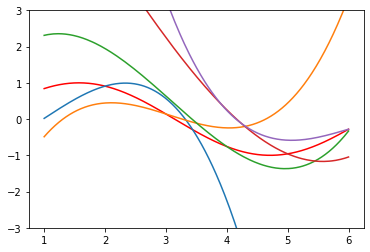

In [229]:
args = np.linspace(x[0], x[5], 500)
base_values = np.sin(args)
plt.plot(args, base_values, 'r')
for i in range(1, points_count):
    spline_values = np.array([splines[i].subs(x_var, arg).n(3) for arg in args])
    plt.plot(args, spline_values)
plt.ylim(-3, 3)

In [225]:
splines[1].subs(x_var, 2)

0.909297426825681

In [159]:
splines[2].subs(x_var, 2)

0.443552540268763

In [165]:
from sympy import diff
diff(splines[1], x_var, 2).subs(x_var, 2)

-1.23354452424749

In [164]:
diff(splines[2], x_var, 2).subs(x_var, 2)

-1.23354452424749